In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = 'C:/Users/En/Documents/Python/Py/'

In [3]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(PATH, year), names=['Name', 'Gender', 'Count'])

names_all = pd.concat(names_by_year, names=['Year', 'Pos']).groupby(['Year', 'Name']).sum()
names_all.head(6)

Count
Year Name          
1900 Aaron      103
     Abbie      112
     Abby         7
     Abe         56
     Abel        15
     Abigail     14

In [4]:
#Первое задание

In [5]:
names_one = names_all.query('Name == ["Ruth", "Robert"]').unstack('Name')

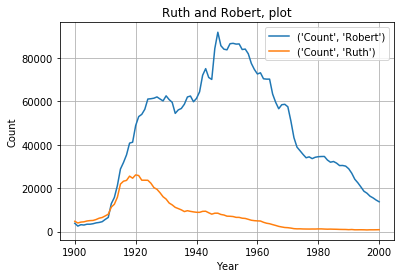

In [6]:
fig = plt.figure()

plt.plot(names_one)

plt.title('Ruth and Robert, plot')
plt.ylabel('Count')
plt.xlabel('Year')

plt.legend(names_one)

plt.grid()

In [7]:
#Второе задание (метод pandas.plot)

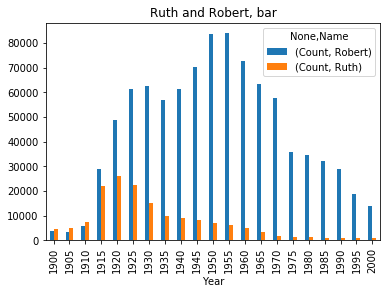

In [8]:
names_two = names_one.query("Year%5 == 0")
names_two.plot.bar(
    title='Ruth and Robert, bar'
)

In [9]:
#Третье задание (метод matplotlib)

In [10]:
names_three = names_all[names_all.index.get_level_values(1).str.startswith('R')]
names_three = names_three.query('Year == 1950').sort_values(by='Count', ascending=0).head(10)

Text(0.5,1,'TOP-10 popular names starts with "R"')

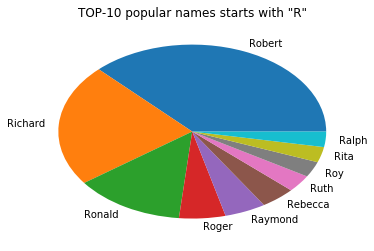

In [11]:
fig = plt.figure()

plt.pie(names_three, labels=names_three.index.get_level_values(1))

plt.title('TOP-10 popular names starts with "R"')

In [12]:
#Четвертое задание

In [13]:
vowel_list = ['A', 'a', 'E', 'e', 'I', 'i', 'O', 'o', 'U', 'u']

def con_len(word):
    num = 0
    for letter in word:
        if letter not in vowel_list:
            num += 1
    return num

In [14]:
names_four = names_all
names_four['Name2'] = names_four.index.get_level_values(1)
names_four['Con Len'] = names_four.apply(lambda row: con_len(row.Name2), axis=1)
del names_four['Name2']
names_four = names_four.groupby(['Con Len', 'Name']).sum()

names_four.head(6)

Count
Con Len Name       
0       Ai      223
        Aoi      31
        Ea        6
        Eua      23
        Ia      129
        Ii        5

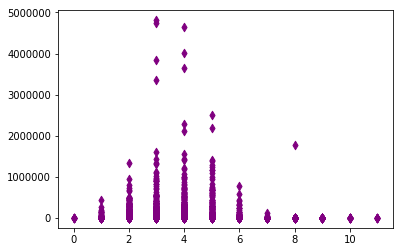

In [15]:
plt.scatter(
    x=names_four.index.get_level_values(0),
    y=names_four.Count,
    marker='d',
    color='purple'
)